In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sidetable

# Pair Programming Intro Machine Learning

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.

- Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

Utilizamos el conjunto de datos "Socio-Economic Country Profiles".

## Objetivos

Los objetivos de hoy son:

1. Buscar un conjunto de datos a analizar:

    Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('datos/soci_econ_country_profiles.csv', index_col=0)

## Exploracion Inicial

In [4]:
df.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,27.8,66.2,2.0,24.8,73.1,6.5,48.6/74.4,119,119,57733,55610,2124,-15944,1.0,91.8,1.0,2.3,24.9/15.4,2086.3/4.8,5.0,13.7,4.8,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,38.9,143.9,69.4,256,10.0,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99,139.59,58.40,37.37,73.30,52.57,12.07,37.95,53.33,90.67,3.77,3.90,26.53,25.64,333.23,0.30,52.57,13.92,34.05,44.06,50.37,58.40,100.0,909

In [5]:
df.shape

(66, 95)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 95 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   country                                                      66 non-null     object 
 1   Region                                                       66 non-null     object 
 2   Surface area (km2)                                           66 non-null     int64  
 3   Population in thousands (2017)                               66 non-null     int64  
 4   Population density (per km2, 2017)                           66 non-null     float64
 5   Sex ratio (m per 100 f, 2017)                                66 non-null     float64
 6   GDP: Gross domestic product (million current US$)            66 non-null     int64  
 7   GDP growth rate (annual %, const. 2005 prices)               66 non-null     float

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Surface area (km2),66.0,1.383839e+06,3.110735e+06,7.190000e+02,6.536700e+04,2.840535e+05,7.929618e+05,1.709825e+07
Population in thousands (2017),66.0,8.655136e+04,2.381736e+05,1.180000e+03,7.155000e+03,1.886700e+04,6.588150e+04,1.409517e+06
"Population density (per km2, 2017)",66.0,3.677606e+02,1.296705e+03,3.200000e+00,4.672500e+01,1.041000e+02,2.113250e+02,8.155500e+03
"Sex ratio (m per 100 f, 2017)",66.0,1.030939e+02,3.266186e+01,8.510000e+01,9.545000e+01,9.735000e+01,1.001500e+02,3.012000e+02
GDP: Gross domestic product (million current US$),66.0,1.054143e+06,2.626195e+06,1.005200e+04,1.668350e+05,3.052720e+05,7.422105e+05,1.803665e+07
"GDP growth rate (annual %, const. 2005 prices)",66.0,2.503030e+00,4.084077e+00,-9.900000e+00,1.425000e+00,2.400000e+00,3.775000e+00,2.630000e+01
GDP per capita (current US$),66.0,2.353165e+04,2.058232e+04,1.410400e+03,6.253775e+03,1.532350e+04,4.039855e+04,8.083110e+04
Economy: Industry (% of GVA),66.0,2.968939e+01,8.588152e+00,7.200000e+00,2.407500e+01,2.845000e+01,3.487500e+01,5.640000e+01
Economy: Services and other activity (% of GVA),66.0,6.539848e+01,1.036784e+01,4.350000e+01,5.932500e+01,6.565000e+01,7.240000e+01,9.270000e+01
Employment: Agriculture (% of employed),66.0,1.057576e+01,1.098157e+01,2.000000e-01,2.700000e+00,6.000000e+00,1.477500e+01,4.430000e+01


In [8]:
df.describe(include ="object").T

,count,unique,top,freq
country,66,66,Argentina,1
Region,66,14,EasternEurope,9
Economy: Agriculture (% of GVA),66,44,2.3,4
Labour force participation (female/male pop. %),66,66,48.6/74.4,1
Population growth rate (average annual %),66,34,1.2,5
Urban population growth rate (average annual %),66,32,1.0,5
"Population age distribution (0-14 / 60+ years, %)",66,66,24.9/15.4,1
International migrant stock (000/% of total pop.),66,66,2086.3/4.8,1
Refugees and others of concern to UNHCR (in thousands),66,66,5.0,1
Health: Physicians (per 1000 pop.),66,36,...,6


Podemos ver que tenemos 66 registros y 95 columnas, con algunos nulos.

2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
    - Esto se hace para que comprendais mejor los datos con los que estais trabajando.
    - Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [9]:
# hemos visto columnas de tipo object que deberían ser float o integer
# creamos un dataframe de las columnas tipo object y una lista de ellas para poder explorarlas

df_object = df.select_dtypes(include='object')
columnas_object = df_object.columns.to_list()

In [10]:
# imprimimos los valores únicos de estas columnas para buscar valores raros que podrían causar que sean tipo object

for col in columnas_object:
    print(col)
    print(df[col].unique())
    print('---------------------')

country
['Argentina' 'Australia' 'Austria' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China, Hong Kong SAR' 'China' 'Colombia' 'Croatia' 'Cyprus' 'Czechia'
 'Denmark' 'Egypt' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'India' 'Indonesia' 'Iran (Islamic Republic of)' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Jordan' 'Lebanon' 'Lithuania' 'Malaysia'
 'Mexico' 'Netherlands' 'New Zealand' 'Norway' 'Pakistan' 'Philippines'
 'Poland' 'Portugal' 'Qatar' 'Republic of Korea' 'Romania'
 'Russian Federation' 'Saudi Arabia' 'Serbia' 'Singapore' 'Slovakia'
 'Slovenia' 'South Africa' 'Spain' 'Sri Lanka' 'Sweden' 'Switzerland'
 'Thailand' 'The former Yugoslav Republic of Macedonia' 'Turkey' 'Ukraine'
 'United Arab Emirates' 'United Kingdom' 'United States of America'
 'Venezuela (Bolivarian Republic of)' 'Vietnam']
---------------------
Region
['SouthAmerica' 'Oceania' 'WesternEurope' 'EasternEurope' 'SouthernEurope'
 'NorthernAmerica' 'EasternAsia

Hay algunas columnas con dos valores juntos que podemos separar en dos columnas

In [11]:
df[['Labour force participation (female pop. %)', 'Labour force participation (male pop. %)']] = df['Labour force participation (female/male pop. %)'].str.split('/', expand=True)
df.drop('Labour force participation (female/male pop. %)', axis=1, inplace=True)

In [12]:
df[['Education: Primary gross enrol. ratio (f per 100 pop.)', 'Education: Primary gross enrol. ratio (m per 100 pop.)']] = df['Education: Primary gross enrol. ratio (f/m per 100 pop.)'].str.split('/', expand=True)
df.drop('Education: Primary gross enrol. ratio (f/m per 100 pop.)', axis=1, inplace=True)

In [13]:
df[['Education: Secondary gross enrol. ratio (f per 100 pop.)', 'Education: Secondary gross enrol. ratio (m per 100 pop.)']] = df['Education: Secondary gross enrol. ratio (f/m per 100 pop.)'].str.split('/', expand=True)
df.drop('Education: Secondary gross enrol. ratio (f/m per 100 pop.)', axis=1, inplace=True)

In [14]:
df[['Education: Tertiary gross enrol. ratio (f per 100 pop.)', 'Education: Tertiary gross enrol. ratio (m per 100 pop.)']] = df['Education: Tertiary gross enrol. ratio (f/m per 100 pop.)'].str.split('/', expand=True)
df.drop('Education: Tertiary gross enrol. ratio (f/m per 100 pop.)', axis=1, inplace=True)

In [15]:
df[['Pop. using improved drinking water (urban, %)', 'Pop. using improved drinking water (rural, %)']] = df['Pop. using improved drinking water (urban/rural, %)'].str.split('/', expand=True)
df.drop('Pop. using improved drinking water (urban/rural, %)', axis=1, inplace=True)

In [16]:
df[['Population age distribution (0-14, %)', 'Population age distribution (60+ years, %)']] = df['Population age distribution (0-14 / 60+ years, %)'].str.split('/', expand=True)
df.drop('Population age distribution (0-14 / 60+ years, %)', axis=1, inplace=True)

In [17]:
# nos quedamos con solo un valor de las columnas de Forested Area y Energy supply

df['Forested area (% of land area)'] = df['Forested area (% of land area)'].apply(lambda x: x.split('/')[1])

In [18]:
df['Energy supply per capita (Gigajoules)'] = df['Energy supply per capita (Gigajoules)'].apply(lambda x: x.split('/')[0])

In [19]:
df['International migrant stock (% of total pop.)'] = df['International migrant stock (000/% of total pop.)'].apply(lambda x: x.split('/')[1])
df.drop('International migrant stock (000/% of total pop.)', axis=1, inplace=True)

Reemplazamos valores raros: ~0.0, -~0.0, ..., -99

In [20]:
# creamos la lista de columnas tipo object de nuevo

df_object = df.select_dtypes(include='object')
columnas_object = df_object.columns.to_list()

In [21]:
# reemplazamos unos valores raros que hemos encontrado con zeros o nulos

for col in columnas_object:
    df[col].replace(to_replace='~0.0', value='0.0', inplace=True)
    df[col].replace(to_replace='...', value=np.nan, inplace=True)
    df[col].replace(to_replace='-~0.0', value='0.0', inplace=True)
    df[col].replace(to_replace='-99', value=np.nan, inplace=True)

In [22]:
# creamos un dataframe de las columnas de tipo numérico menos la columna de la variable respuesta

columnas_numeric = df.select_dtypes(include = np.number)

In [23]:
# reemplazamos todos los valores de -99 con nulos en las columnas numéricas

for col in columnas_numeric:
    df[col].replace(to_replace=-99, value=np.nan, inplace=True)

In [24]:
# cambiamos las columnas tipo object a tipo float

for col in columnas_object:
    df[col] = df[col].astype('float64', errors='ignore')

In [25]:
# examinamos de nuevo los nulos

df.stb.missing()

,missing,total,percent
Net Official Development Assist. received (% of GNI),66,66,100.000000
"Pop. using improved sanitation facilities (urban/rural, %)",40,66,60.606061
Education: Government expenditure (% of GDP),10,66,15.151515
"Taxes on income, profits and capital gains (% of revenue)",9,66,13.636364
Tax revenue (% of GDP),8,66,12.121212
"Air transport, freight (million ton-km)",8,66,12.121212
Health: Physicians (per 1000 pop.),7,66,10.606061
"Air transport, passengers carried",5,66,7.575758
Education: Tertiary gross enrol. ratio (m per 100 pop.),5,66,7.575758
Education: Tertiary gross enrol. ratio (f per 100 pop.),5,66,7.575758


In [26]:
# eliminamos las columnas con más de siete nulos

df.drop(["Net Official Development Assist. received (% of GNI)", "Taxes on income, profits and capital gains (% of revenue)", "Air transport, freight (million ton-km)", 
         "Tax revenue (% of GDP)", "Health: Physicians (per 1000 pop.)", "Education: Government expenditure (% of GDP)", 
         "Pop. using improved sanitation facilities (urban/rural, %)"], axis=1, inplace=True)

Examinamos correlaciones

Eliminamos las columnas con una correlación menor a 0.3 (valor absoluto)

In [27]:
df_corr = df.corr()

In [28]:
df_corr_qol = df_corr.loc['Quality Of Life Index'].reset_index()
df_corr_qol.columns = ['columna', 'correlacion con QOL']
df_corr_qol

,columna,correlacion con QOL
0,Surface area (km2),-0.107855
1,Population in thousands (2017),-0.230366
2,"Population density (per km2, 2017)",-0.193296
3,"Sex ratio (m per 100 f, 2017)",-0.007246
4,GDP: Gross domestic product (million current US$),0.098620
5,"GDP growth rate (annual %, const. 2005 prices)",0.093836
6,GDP per capita (current US$),0.562653
7,Economy: Agriculture (% of GVA),-0.618212
8,Economy: Industry (% of GVA),-0.324397
9,Economy: Services and other activity (% of GVA),0.557495


In [29]:
# eliminamos las columnas que no están correlacionadas con la variable respuesta

df_corr_baja = df_corr_qol[(df_corr_qol['correlacion con QOL'] > -0.3) & ((df_corr_qol['correlacion con QOL'] < 0.3))]
df.drop(columns=df_corr_baja['columna'].to_list(), inplace=True)

In [30]:
# eliminamos columnas redundantes

col_drop = ['Mobile-cellular subscriptions (per 100 inhabitants).1', 'Economy: Agriculture (% of GVA)', 
            'Economy: Industry (% of GVA)', 'Economy: Services and other activity (% of GVA)', 
             'Life expectancy at birth, female (years)', 'Life expectancy at birth, male (years)', 
             'Economy: Agriculture (% of GVA)', 'Economy: Industry (% of GVA)', 'Economy: Services and other activity (% of GVA)']
df.drop(columns=col_drop, inplace=True)

Examinamos outliers

In [31]:
columnas_numeric = df.select_dtypes(include = np.number)
columnas_numeric = columnas_numeric.columns

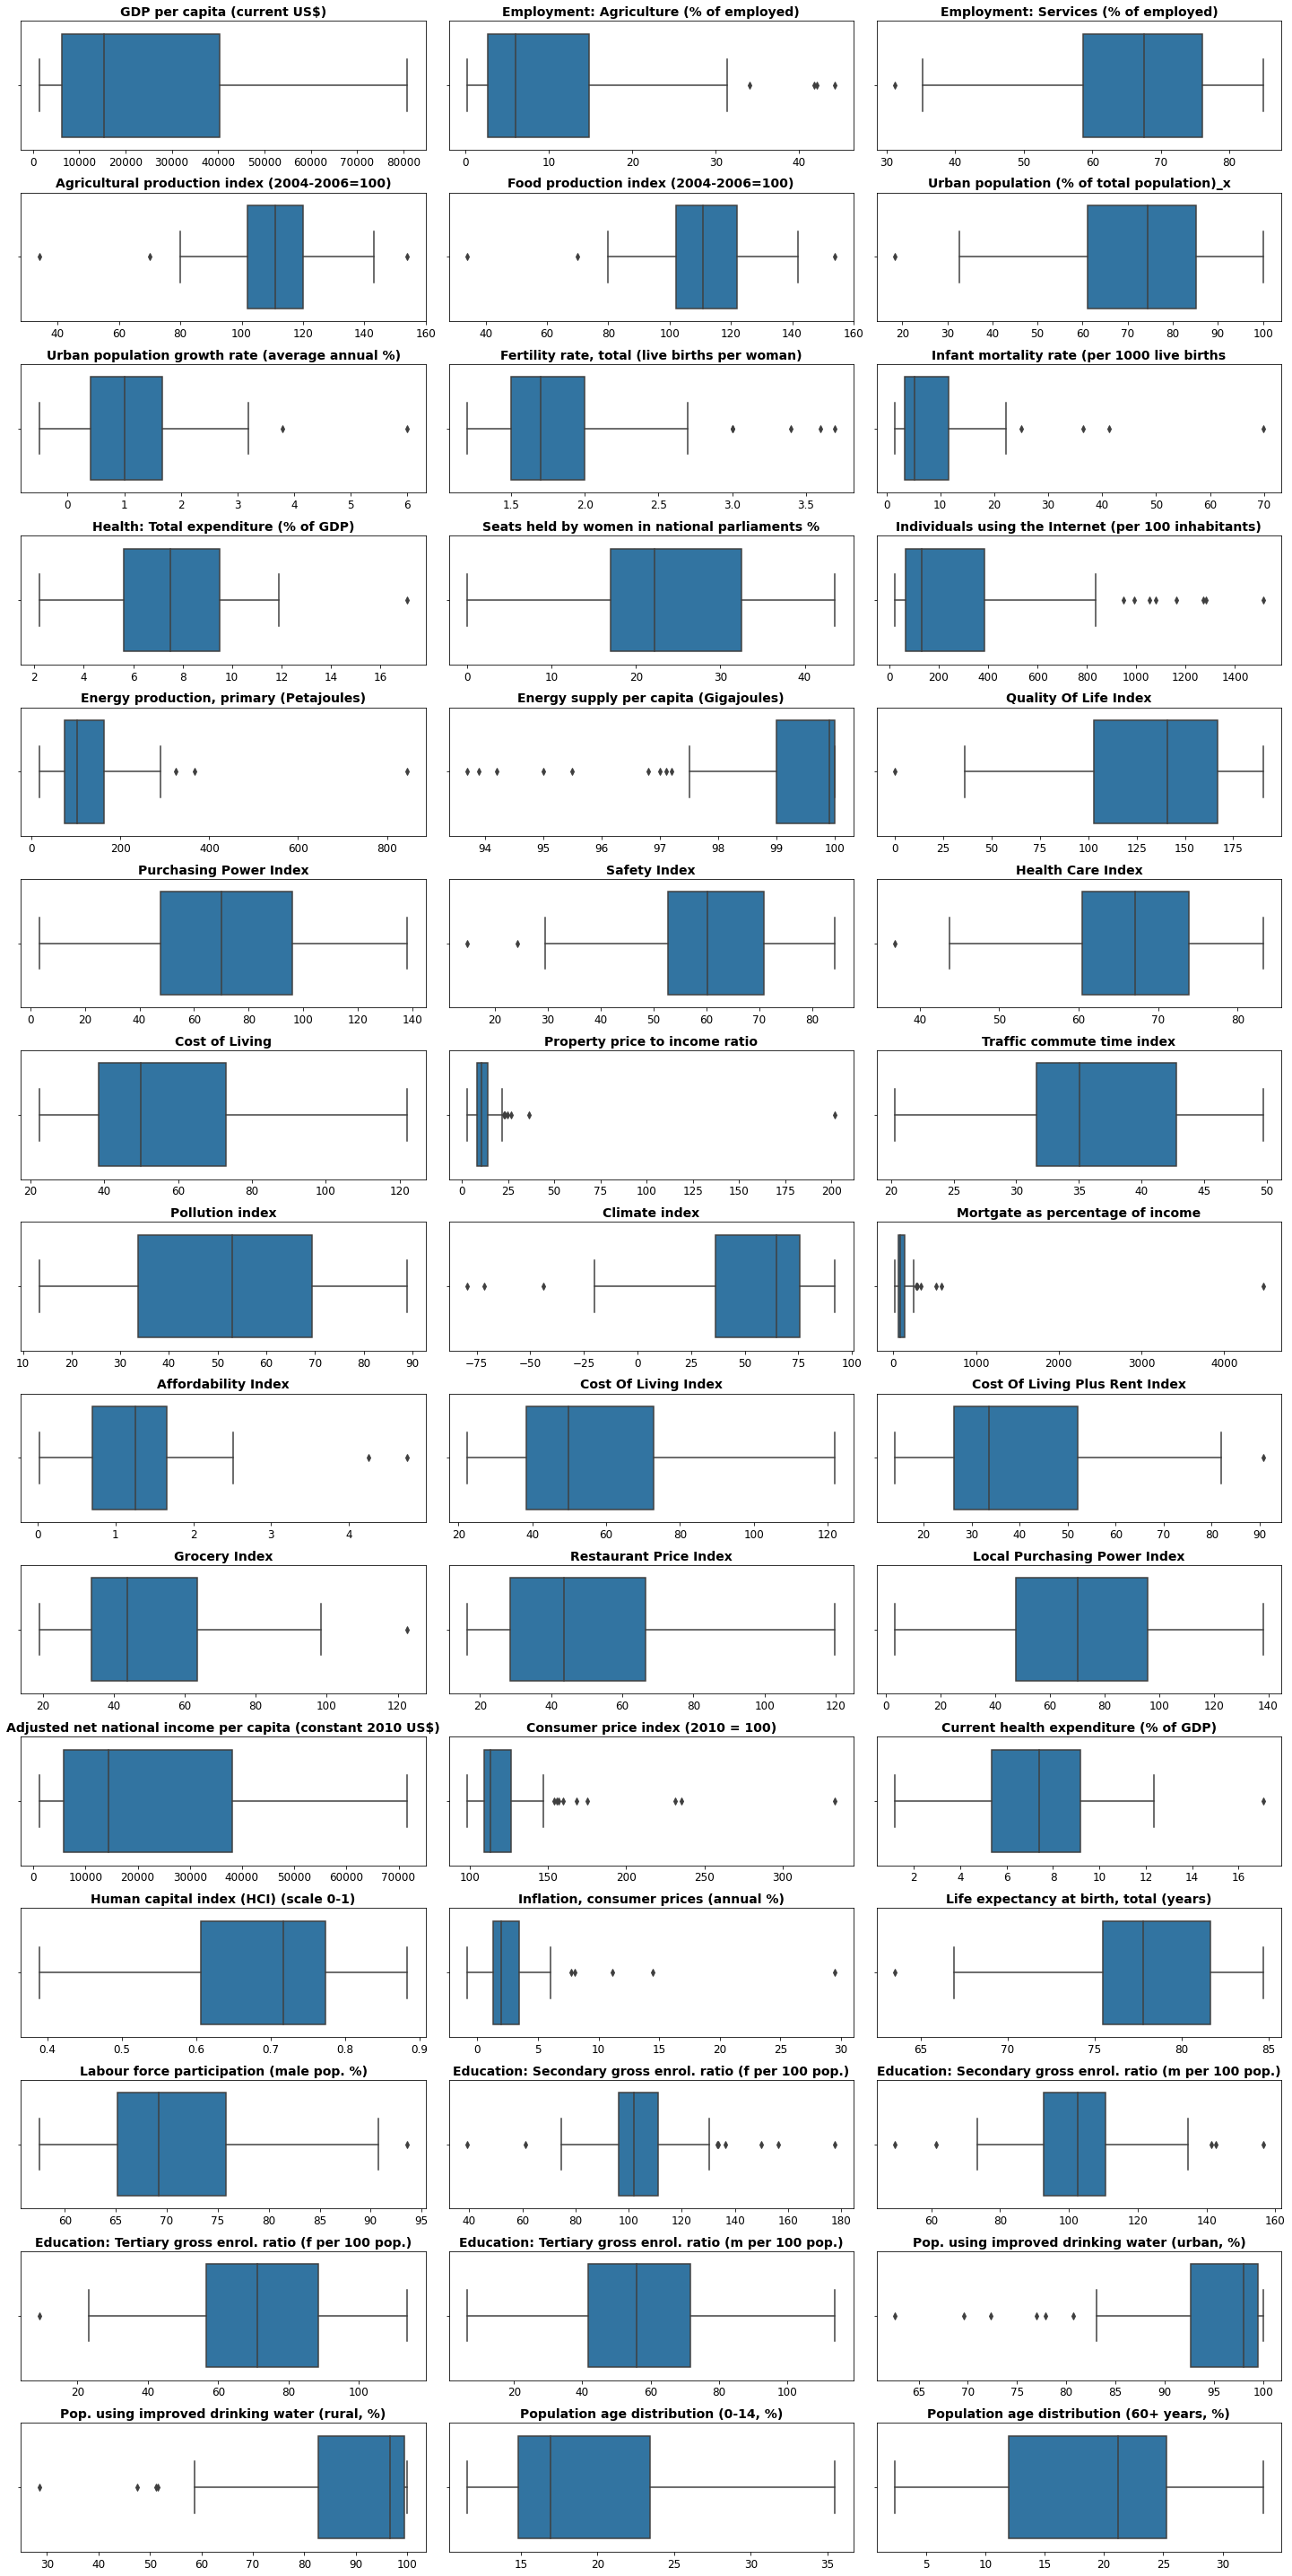

In [32]:
fig, axes = plt.subplots(nrows = 15, ncols = 3, figsize = (20, 40))
axes = axes.flat
for i, colum in enumerate(columnas_numeric):
    sns.boxplot(data = df,
                x = colum,
                ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 14, fontweight = "bold")
    axes[i].tick_params(labelsize = 12)
    axes[i].set_xlabel("")
fig.tight_layout();

In [33]:
df[["country", "Property price to income ratio"]].sort_values(by= "Property price to income ratio", ascending=False).head(2)

,country,Property price to income ratio
64,Venezuela (Bolivarian Republic of),202.07
10,"China, Hong Kong SAR",36.15


In [34]:
df[["country", "Inflation, consumer prices (annual %)"]].sort_values(by= "Inflation, consumer prices (annual %)", ascending=False).head(8)

,country,"Inflation, consumer prices (annual %)"
17,Egypt,29.506608
60,Ukraine,14.438323
59,Turkey,11.144311
26,Iran (Islamic Republic of),8.044924
54,Sri Lanka,7.704138
35,Mexico,6.041457
3,Belarus,6.031837
52,South Africa,5.181082


In [35]:
df[["country", "Mortgate as percentage of income"]].sort_values(by= "Mortgate as percentage of income", ascending=False).head(2)

,country,Mortgate as percentage of income
64,Venezuela (Bolivarian Republic of),4469.07
3,Belarus,587.51


In [36]:
df[["country", "Current health expenditure (% of GDP)"]].sort_values(by= "Current health expenditure (% of GDP)", ascending=False).head(5)

,country,Current health expenditure (% of GDP)
63,United States of America,17.061269
56,Switzerland,12.346322
20,France,11.312892
21,Germany,11.246835
55,Sweden,11.018746


In [37]:
df[["country", "Affordability Index"]].sort_values(by= "Affordability Index", ascending=False).head(5)

,country,Affordability Index
47,Saudi Arabia,4.75
63,United States of America,4.25
14,Cyprus,2.51
52,South Africa,2.38
61,United Arab Emirates,2.38


In [38]:
df[["country", "Urban population growth rate (average annual %)"]].sort_values(by= "Urban population growth rate (average annual %)", ascending=False).head(3)

,country,Urban population growth rate (average annual %)
43,Qatar,6.0
31,Jordan,3.8
32,Lebanon,3.2


In [39]:
df[["country", "Energy production, primary (Petajoules)"]].sort_values(by= "Energy production, primary (Petajoules)", ascending=False).head(3)

,country,"Energy production, primary (Petajoules)"
43,Qatar,846
61,United Arab Emirates,366
8,Canada,324


In [40]:
df[["country", "Consumer price index (2010 = 100)"]].sort_values(by= "Consumer price index (2010 = 100)", ascending=False).head(8)

,country,Consumer price index (2010 = 100)
26,Iran (Islamic Republic of),333.673322
60,Ukraine,235.299204
17,Egypt,231.094115
59,Turkey,174.968703
46,Russian Federation,168.175239
24,India,159.829465
39,Pakistan,156.911346
6,Brazil,155.668786


In [41]:
# eliminamos Venezuela por los outliers 

df.drop(index=64, axis=0, inplace=True)

In [42]:
df.to_csv('datos/soci_econ_country_profiles_v2.csv')